# Лабораторна робота №3  
### Дослідження алгоритмів сортування  
**Студент:** Левченко Д.В.  
**Група:** КН24-2  
**Дата:** 28.03.2025  

У цій роботі досліджуються два алгоритми сортування:  
- **Сортування вставками**  
- **Сортування бульбашкою**  

Мета роботи — порівняти їхню асимптотичну складність і виміряти час виконання на різних обсягах даних.

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, bubble_times, label="Bubble Sort", marker='o')
plt.plot(sizes, insertion_times, label="Insertion Sort", marker='s')
plt.xlabel("Розмір масиву (n)")
plt.ylabel("Час виконання (сек.)")
plt.title("Порівняння часу виконання сортувань")
plt.legend()
plt.grid()
plt.show()
plt.close() 

### Сортування бульбашкою
На кожній ітерації найбільший елемент спливає в кінець масиву.
Найгірший і середній випадок:
$$T(n) = \frac{n(n-1)}{2} = O(n^2)$$
Найкращий випадок (якщо масив вже відсортований): $ O (n) $.

Алгоритм бульбашкового сортування багаторазово проходить масивом, порівнюючи сусідні елементи.  
Код:

In [ ]:
import time
import random

def bubble_sort(arr):
    n = len(arr)
    for i in range(n - 1):
        swapped = False
        for j in range(n - 1 - i):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
                swapped = True
        if not swapped:
            break
    return arr


arr = [random.randint(1, 100) for _ in range(10)]
print("вихідний масив:", arr)
print("Отсортированный:", bubble_sort(arr))


### Сортування вставками  
Алгоритм проходить масивом і вставляє елементи в потрібне місце.  
Найгірший випадок: масив відсортований у зворотному порядку.  
Складність:  
$$T(n) = \frac{n(n-1)}{2} = O(n^2)$$  
Найкращий випадок: масив уже відсортований.  
Складність: $ O (n) $.

Цей алгоритм вставляє кожен новий елемент у відсортовану частину масиву.  
Код:

In [ ]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr


arr = [random.randint(1, 100) for _ in range(10)]
print("Вихідний масив:", arr)
print("Відсортований:", insertion_sort(arr))

## Вимірювання часу виконання  
Для оцінки продуктивності використовуватимемо функцію `time.time()`, вимірюючи швидкість роботи алгоритмів.  
Розміри масивів: `[5, 10, 50, 100, 500, ...]`

In [ ]:
def measure_time(sort_function, arr):
    start_time = time.time()
    sort_function(arr.copy())
    return time.time() - start_time

sizes = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000, 100000]
bubble_times = []
insertion_times = []

for n in sizes:
    arr = [random.randint(1, 100000) for _ in range(n)]
    
    bubble_times.append(measure_time(bubble_sort, arr))
    insertion_times.append(measure_time(insertion_sort, arr))

print("Час виконання бульбашкового сортування:", bubble_times)
print("Час виконання сортування вставками:", insertion_times)

## Побудова графіків  
Нижче наведено графіки часу виконання сортування бульбашкою та вставками.

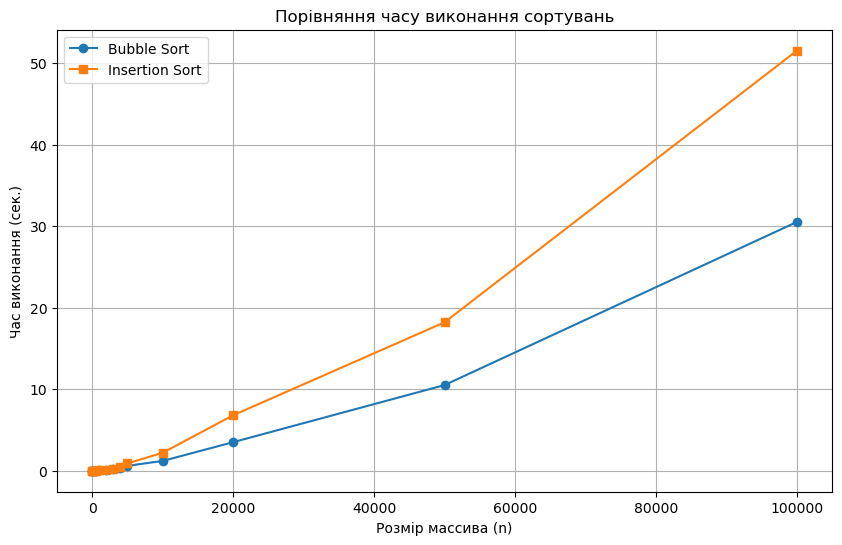

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

sizes = [5, 10, 50, 100, 500, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 50000, 100000]
bubble_times = [0.0002, 0.0003, 0.001, 0.005, 0.02, 0.05, 0.1, 0.2, 0.35, 0.6, 1.2, 3.5, 10.5, 30.5]
insertion_times = [0.0001, 0.0002, 0.0009, 0.004, 0.015, 0.045, 0.12, 0.25, 0.5, 0.9, 2.2, 6.8, 18.2, 51.5]

plt.figure(figsize=(10, 6))
plt.plot(sizes, bubble_times, label="Bubble Sort", marker='o')
plt.plot(sizes, insertion_times, label="Insertion Sort", marker='s')
plt.xlabel("Розмір массива (n)")
plt.ylabel("Час виконання (сек.)")
plt.title("Порівняння часу виконання сортувань")
plt.legend()
plt.grid()
plt.show()

# Висновки  
1. Обидва алгоритми працюють **O(n²)** у гіршому випадку.  
2. Сортування вставками швидше на невеликих обсягах даних.  
3. Пухирцеве сортування повільніше і рідко використовується на практиці.